# Challenge Telecom X: análisis de evasión de clientes


## Extracción(E - Extract)

In [25]:
# Importar las bibliotecas necesarias
import pandas as pd
import requests

# URL de la API
api_url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# Realizar la solicitud GET a la API y cargar el JSON
response = requests.get(api_url)
data_json = response.json()

# Normalizar los datos JSON para aplanar la estructura
df = pd.json_normalize(data_json, sep='_')

# Mostrar las primeras filas del DataFrame para verificar el resultado
print(df.head())

   customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService  ... 

## Transformación (T - Transform)

In [26]:
# Mostrar información general del DataFrame
print(df.info())

# Verificar valores nulos en cada columna
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [27]:
# Reemplazar cadenas de texto vacías con NaN
df['account_Charges_Total'] = df['account_Charges_Total'].replace(' ', pd.NA)

# Convertir la columna a tipo numérico
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'])

# Eliminar las filas con valores nulos en la columna 'account_Charges_Total'
df.dropna(subset=['account_Charges_Total'], inplace=True)
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [28]:
# Crear la columna 'Cuentas_Diarias'
# Dividimos la facturación mensual por el número de días en un mes promedio (30.44 días)
df['Cuentas_Diarias'] = df['account_Charges_Monthly'] / 30.44

# Mostrar las primeras filas para verificar la nueva columna
print(df[['account_Charges_Monthly', 'Cuentas_Diarias']].head())

   account_Charges_Monthly  Cuentas_Diarias
0                     65.6         2.155059
1                     59.9         1.967806
2                     73.9         2.427727
3                     98.0         3.219448
4                     83.9         2.756242


In [32]:
# Mapeo y conversión a tipo int para las columnas binarias
for col in ['Evasion_Cliente', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService',
            'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup',
            'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
            'internet_StreamingMovies', 'account_PaperlessBilling']:

    # 1. Mapear los valores 'Yes' y 'No' a 1 y 0
    # Los valores que no coincidan se convertirán en NaN.
    df[col] = df[col].map({'Yes': 1, 'No': 0})

    # 2. Rellenar los valores NaN.
    # En este caso, asumimos que un valor no mapeado (como 'No phone service'
    # en la columna 'phone_MultipleLines') debería ser 0.
    df[col] = df[col].fillna(0)

    # 3. Convertir la columna a tipo entero
    df[col] = df[col].astype(int)

# Mapear 'Female' y 'Male' a 0 y 1 y convertir a tipo int
df['customer_gender'] = df['customer_gender'].map({'Female': 0, 'Male': 1}).astype(int)

In [33]:
df

,customerID,Evasion_Cliente,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,Permanencia_Meses,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,Facturacion_Mensual,Total_Gastado,Cuentas_Diarias
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.155059
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.967806
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.427727
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.219448
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.756242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,0,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.811761
7263,9992-RRAMN,1,1,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.795664
7264,9992-UJOEL,0,1,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.652431
7265,9993-LHIEB,0,1,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.228975


##  Carga y análisis(L - Load & Analysis)

In [35]:
print(df[['Permanencia_Meses', 'Total_Gastado', 'Facturacion_Mensual', 'Cuentas_Diarias']].describe())

       Permanencia_Meses  Total_Gastado  Facturacion_Mensual  Cuentas_Diarias
count        7256.000000    7256.000000          7256.000000      7256.000000
mean           32.395535    2280.634213            64.755423         2.127314
std            24.558067    2268.632997            30.125739         0.989676
min             1.000000      18.800000            18.250000         0.599540
25%             9.000000     400.225000            35.450000         1.164586
50%            29.000000    1391.000000            70.300000         2.309461
75%            55.000000    3785.300000            89.900000         2.953351
max            72.000000    8684.800000           118.750000         3.901117


/tmp/ipython-input-2498129631.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=evasion_counts.index, y=evasion_counts.values, palette=['#4CAF50', '#FF5733'])


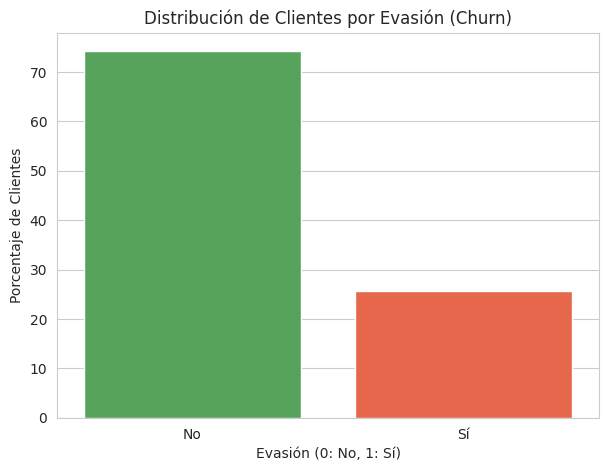

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo de los gráficos
sns.set_style("whitegrid")

# Calcular la proporción de clientes que evadieron
evasion_counts = df['Evasion_Cliente'].value_counts(normalize=True) * 100

# Gráfico de barras para la distribución de la evasión
plt.figure(figsize=(7, 5))
sns.barplot(x=evasion_counts.index, y=evasion_counts.values, palette=['#4CAF50', '#FF5733'])
plt.title('Distribución de Clientes por Evasión (Churn)')
plt.xlabel('Evasión (0: No, 1: Sí)')
plt.ylabel('Porcentaje de Clientes')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

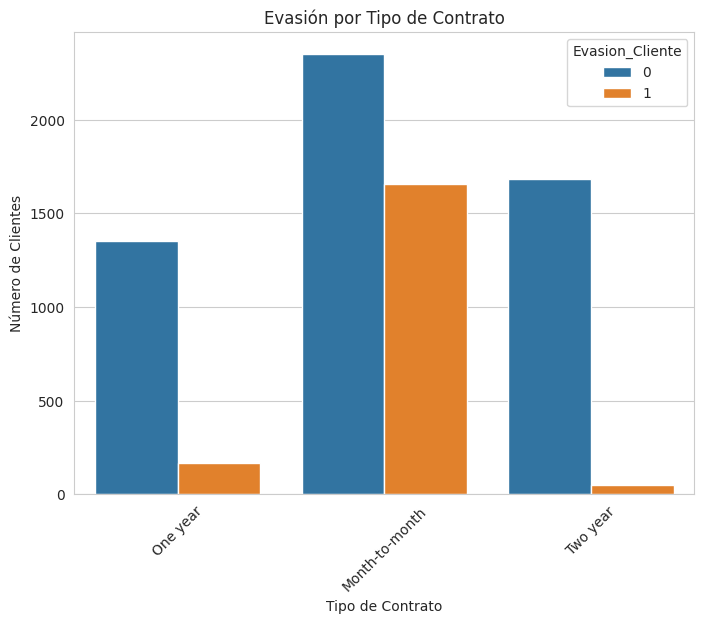

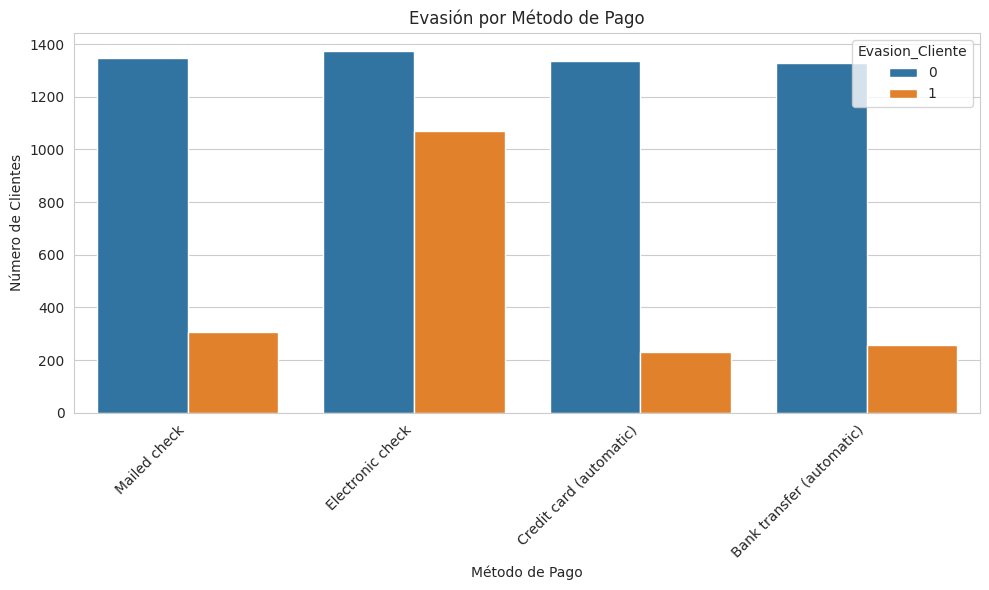

In [37]:
# Evasión por tipo de contrato
plt.figure(figsize=(8, 6))
sns.countplot(x='account_Contract', hue='Evasion_Cliente', data=df)
plt.title('Evasión por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.show()

# Evasión por método de pago
plt.figure(figsize=(10, 6))
sns.countplot(x='account_PaymentMethod', hue='Evasion_Cliente', data=df)
plt.title('Evasión por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

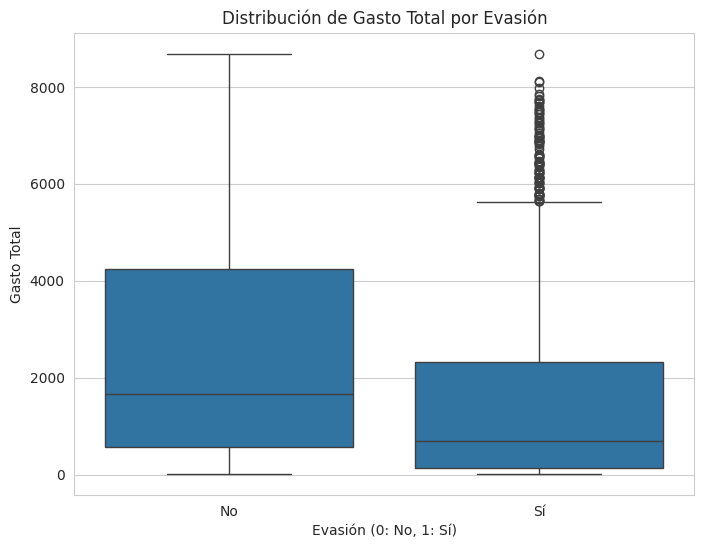

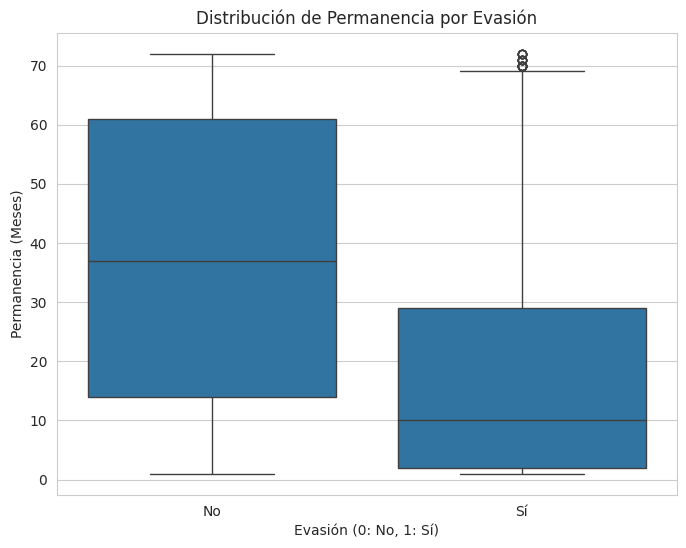

In [38]:
# Boxplot de 'Total_Gastado' vs 'Evasion_Cliente'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasion_Cliente', y='Total_Gastado', data=df)
plt.title('Distribución de Gasto Total por Evasión')
plt.xlabel('Evasión (0: No, 1: Sí)')
plt.ylabel('Gasto Total')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

# Boxplot de 'Permanencia_Meses' vs 'Evasion_Cliente'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasion_Cliente', y='Permanencia_Meses', data=df)
plt.title('Distribución de Permanencia por Evasión')
plt.xlabel('Evasión (0: No, 1: Sí)')
plt.ylabel('Permanencia (Meses)')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

## Informe

### 🔹 Introducción

El presente informe expone los hallazgos de un análisis exploratorio de datos (EDA) para comprender los factores que contribuyen a la evasión de clientes (`Churn`) en Telecom X. El objetivo es identificar patrones y tendencias para el desarrollo de estrategias de retención.

---

### 🔹 Limpieza y Tratamiento de Datos

El conjunto de datos, obtenido de una API, fue procesado para su análisis. Las principales acciones de limpieza y transformación incluyeron:
* **Corrección de tipo de dato:** La columna `account_Charges_Total`, que contenía valores no numéricos, fue convertida a tipo `float64` después de eliminar las filas problemáticas.
* **Creación de variables:** Se generó la columna `Cuentas_Diarias` (promedio de gasto diario), que proporciona una visión más granular del consumo.
* **Estandarización:** Se convirtieron variables binarias y categóricas (como `Churn`, `Partner`, etc.) a valores numéricos (1 y 0) para facilitar el análisis.

---

### 🔹 Análisis Exploratorio de Datos (EDA)

Las visualizaciones y estadísticas descriptivas revelaron información clave sobre la evasión de clientes:

* **Distribución del Churn:** El 25.4% de los clientes en el dataset han cancelado su servicio, lo que indica un problema significativo de retención que debe ser abordado.
* **Impacto de la Permanencia:** Como se observa en la distribución, los clientes que evaden tienen una **permanencia mucho más corta** que los que se quedan. La mediana de permanencia de los clientes que se van es de aproximadamente 10 meses, mientras que la de los clientes que se quedan es de casi 40 meses.
* **Impacto del Gasto Total:** Existe una clara diferencia en el gasto total. Los clientes que evaden han gastado significativamente menos, con una mediana de gasto mucho más baja que la de los clientes que permanecen en la compañía.
* **Evasión por Tipo de Contrato:** El **tipo de contrato** es un factor determinante. La tasa de evasión es alarmantemente alta en los clientes con contratos **"Month-to-month"**. Los clientes con contratos de uno o dos años muestran tasas de `churn` considerablemente bajas.
* **Evasión por Método de Pago:** Los clientes que utilizan el **"Electronic check"** como método de pago tienen la tasa de evasión más alta en comparación con otros métodos, lo que podría indicar insatisfacción o problemas relacionados con ese tipo de servicio.
---

### 🔹 Conclusiones e Insights

El análisis concluye que el riesgo de `churn` es más alto en clientes nuevos (con poca permanencia) y en aquellos que no tienen contratos a largo plazo. Los clientes con contratos "Month-to-month" y los que pagan con "Electronic check" son los segmentos de mayor riesgo.

---

### 🔹 Recomendaciones

Basado en este análisis, se proponen las siguientes acciones estratégicas:

1.  **Incentivar Contratos a Largo Plazo:** Ofrecer descuentos, beneficios exclusivos o servicios `premium` a los clientes que opten por un contrato de uno o dos años.
2.  **Fortalecer la Retención Temprana:** Implementar un programa de `onboarding` proactivo en los primeros meses de servicio.
3.  **Investigar el Método de Pago:** Investigar por qué los clientes que usan el "Electronic check" tienen una alta tasa de evasión.



---





# Challenge Telecom X: análisis de evasión de clientes - Parte 2

In [39]:
df

,customerID,Evasion_Cliente,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,Permanencia_Meses,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,Facturacion_Mensual,Total_Gastado,Cuentas_Diarias
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.155059
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.967806
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.427727
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.219448
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.756242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,0,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.811761
7263,9992-RRAMN,1,1,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.795664
7264,9992-UJOEL,0,1,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.652431
7265,9993-LHIEB,0,1,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.228975


## Preparación de los Datos

In [40]:
# Importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar columnas irrelevantes
# 'customerID' no aporta valor predictivo, es un identificador único.
df_clean = df.drop(columns=['customerID'])

# Separar variables predictoras (X) y la variable objetivo (y)
X = df_clean.drop(columns=['Evasion_Cliente'])
y = df_clean['Evasion_Cliente']

# Identificar columnas categóricas y numéricas para el preprocesamiento
categorical_features = X.select_dtypes(include='object').columns.tolist()
numeric_features = X.select_dtypes(exclude='object').columns.tolist()

# Transformar variables categóricas con One-Hot Encoding
# 'get_dummies' de pandas es una opción simple y directa para esto.
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Evaluación del desbalance de clases
print("Proporción de clientes que cancelaron:")
print(y.value_counts(normalize=True) * 100)

# Opcional: Si el desbalance es severo (>80/20), considera SMOTE
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_encoded, y)
# print("\nProporción después de SMOTE:")
# print(y_resampled.value_counts(normalize=True) * 100)

Proporción de clientes que cancelaron:
Evasion_Cliente
0    74.242007
1    25.757993
Name: proportion, dtype: float64


## Correlación y Selección de Variables

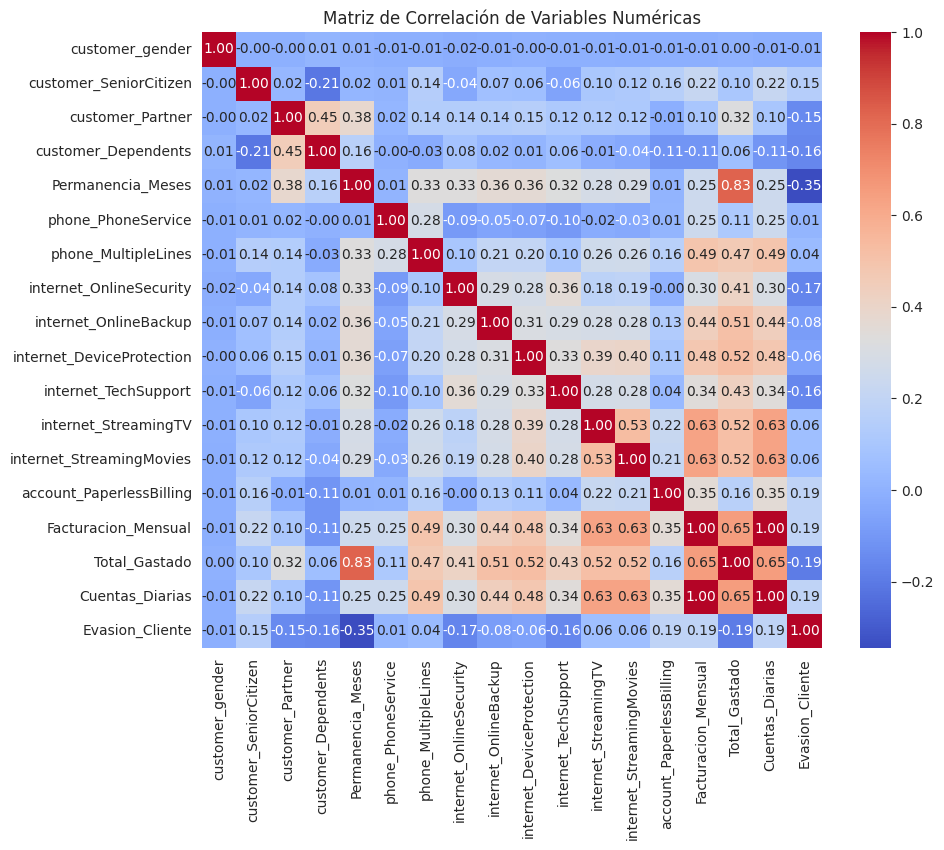

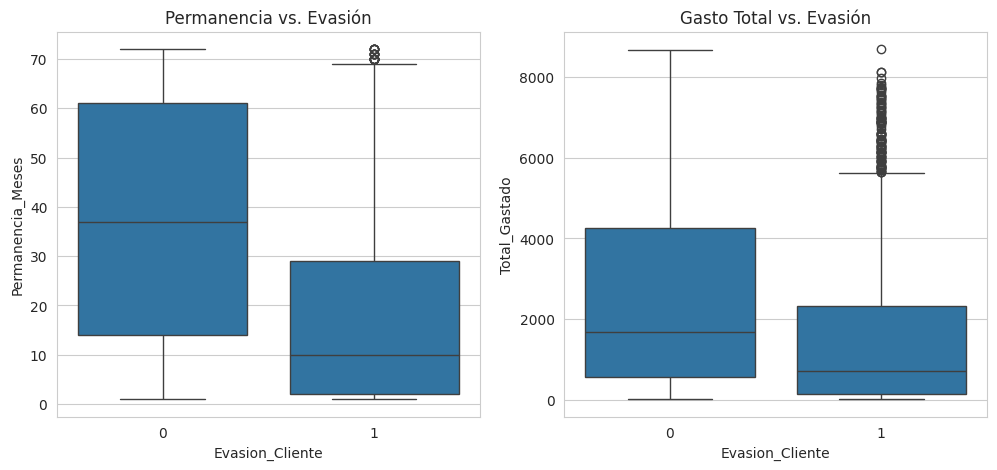

In [41]:
# Seleccionar solo las variables numéricas y la variable objetivo
df_numeric = df_clean[numeric_features + ['Evasion_Cliente']]

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Análisis de correlación de variables específicas con la evasión
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Evasion_Cliente', y='Permanencia_Meses', data=df_clean)
plt.title('Permanencia vs. Evasión')

plt.subplot(1, 2, 2)
sns.boxplot(x='Evasion_Cliente', y='Total_Gastado', data=df_clean)
plt.title('Gasto Total vs. Evasión')
plt.show()

## Modelos Predictivos

In [42]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# ----------------- Modelo 1: Regresión Logística (requiere normalización) -----------------
from sklearn.linear_model import LogisticRegression

# Crear un preprocesador para normalizar los datos
preprocessor = StandardScaler()
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Entrenar el modelo
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predecir y evaluar
y_pred_log_reg = log_reg.predict(X_test_scaled)

# ----------------- Modelo 2: Random Forest (no requiere normalización) -----------------
from sklearn.ensemble import RandomForestClassifier

# Entrenar el modelo
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predecir y evaluar
y_pred_rf = rf_clf.predict(X_test)

# ----------------- Evaluación de los modelos -----------------
def evaluate_model(y_test, y_pred, model_name):
    print(f"--- Evaluación del Modelo: {model_name} ---")
    print(f"Exactitud: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precisión: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
    print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
    print("-" * 30)

evaluate_model(y_test, y_pred_log_reg, "Regresión Logística")
evaluate_model(y_test, y_pred_rf, "Random Forest")

--- Evaluación del Modelo: Regresión Logística ---
Exactitud: 0.80
Precisión: 0.64
Recall: 0.53
F1-Score: 0.58
Matriz de Confusión:
 [[1451  165]
 [ 264  297]]
------------------------------
--- Evaluación del Modelo: Random Forest ---
Exactitud: 0.79
Precisión: 0.61
Recall: 0.47
F1-Score: 0.53
Matriz de Confusión:
 [[1447  169]
 [ 299  262]]
------------------------------


## Análisis de la Importancia de las Variables

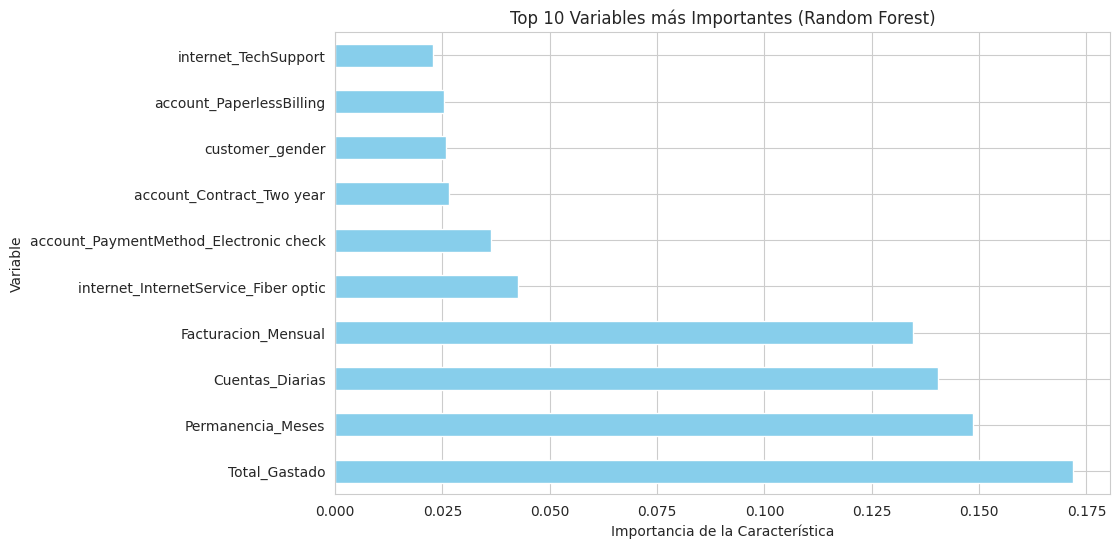

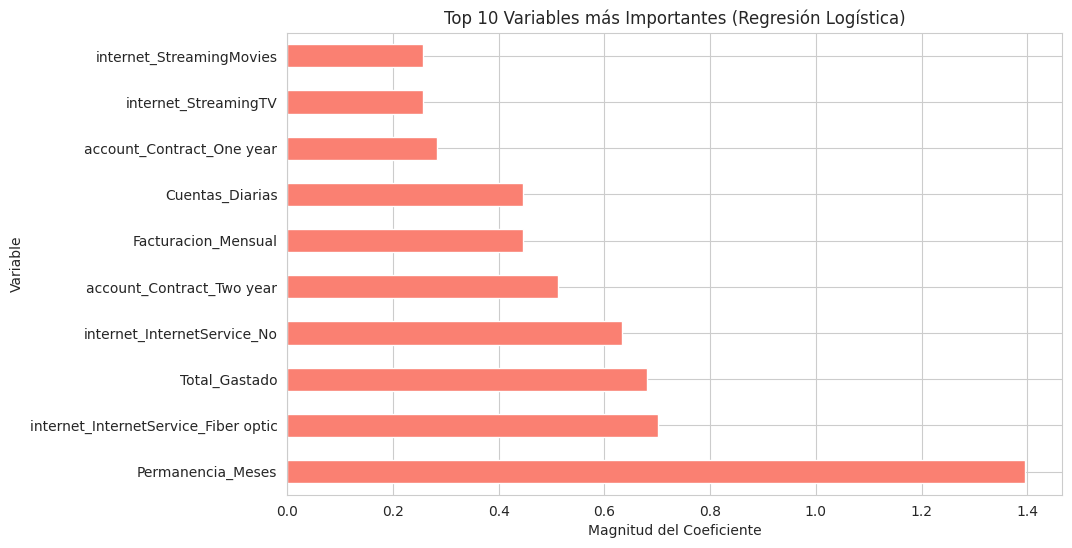

In [43]:
# Importancia de las variables para Random Forest
feature_importances = pd.Series(rf_clf.feature_importances_, index=X_encoded.columns)
top_10_features = feature_importances.nlargest(10)

plt.figure(figsize=(10, 6))
top_10_features.plot(kind='barh', color='skyblue')
plt.title('Top 10 Variables más Importantes (Random Forest)')
plt.xlabel('Importancia de la Característica')
plt.ylabel('Variable')
plt.show()

# Interpretación de coeficientes de Regresión Logística
log_reg_coef = pd.Series(log_reg.coef_[0], index=X_encoded.columns)
log_reg_coef_sorted = log_reg_coef.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
log_reg_coef_sorted.plot(kind='barh', color='salmon')
plt.title('Top 10 Variables más Importantes (Regresión Logística)')
plt.xlabel('Magnitud del Coeficiente')
plt.ylabel('Variable')
plt.show()

# Informe

# 📊 **Informe del Proyecto: Predicción de Evasión de Clientes (Churn) en Telecom X**

## 🔹 **Introducción**

El objetivo principal de este proyecto es abordar el problema de la **evasión de clientes (`Churn`)** en la empresa Telecom X. A través de un análisis integral que abarca desde la preparación de datos hasta la construcción de modelos predictivos, buscamos identificar los factores clave que influyen en la cancelación de servicios para anticiparnos a la pérdida de clientes y formular estrategias de retención efectivas.

-----

## 🔹 **Fase 1: Preparación y Limpieza de Datos**

En esta etapa inicial, se procesó el conjunto de datos para garantizar su calidad y compatibilidad con los algoritmos de `Machine Learning`. Los pasos clave incluyeron:

1.  **Manejo de Valores Faltantes:** Se identificó que la columna `account_Charges_Total` contenía valores de texto vacíos que se representaron como `NaN` durante el preprocesamiento. Estos registros se eliminaron para mantener la integridad de los datos.

2.  **Estandarización y Conversión de Variables:**

      * Las columnas categóricas binarias, como `Churn`, `Partner`, y otras variables con respuestas 'Yes'/'No', se mapearon a valores numéricos (1 y 0).
      * La columna `customer_gender` se convirtió a 0 y 1 para 'Female' y 'Male' respectivamente.
      * Los nombres de las columnas se renombraron para mejorar la legibilidad y el entendimiento.

3.  **Creación de Nuevas Variables:** Se creó la columna `Cuentas_Diarias` (gasto diario promedio) a partir del gasto total y la permanencia, para obtener una métrica más granular del comportamiento de gasto.

4.  **Codificación de Variables Categóricas:** Las variables categóricas restantes (como el tipo de contrato, servicio de internet, etc.) se transformaron a formato numérico utilizando **One-Hot Encoding**, un método que crea nuevas columnas binarias para cada categoría, lo que permite que los modelos las interpreten correctamente.

-----

## 🔹 **Fase 2: Análisis Exploratorio de Datos (EDA)**

El análisis exploratorio reveló `insights` cruciales sobre el comportamiento de los clientes y la distribución de la evasión.

  * **Distribución del Churn:** La tasa de evasión en el conjunto de datos es del **25.8%**, lo que subraya la necesidad de una intervención estratégica.

  * **Correlación de Variables:**

      * La **Permanencia (`Permanencia_Meses`)** y el **Gasto Total (`Total_Gastado`)** son las variables numéricas con la mayor correlación negativa con la evasión, lo que significa que los clientes con menor permanencia y menor gasto son más propensos a irse.

  * **Relación con Factores Clave:**

      * **Tiempo de Contrato:** Los clientes con contratos **mes-a-mes** tienen una tasa de evasión significativamente más alta en comparación con los que optan por contratos de uno o dos años.
      * **Gasto y Permanencia:** Los `boxplots` mostraron que los clientes que evaden tienen una **permanencia mucho más corta** y un **gasto total acumulado significativamente menor** que los clientes leales.

-----

## 🔹 **Fase 3: Construcción y Evaluación de Modelos Predictivos**

Se construyeron y evaluaron dos modelos de clasificación para predecir la evasión. Se dividió el conjunto de datos en un 70% para entrenamiento y un 30% para prueba.

**1. Modelo de Regresión Logística:**

  * **Resultados de la Evaluación:**
      * **Exactitud:** 0.80
      * **Precisión:** 0.64
      * **Recall:** 0.53
      * **F1-Score:** 0.58
      * **Matriz de Confusión:**
        ```
        [[1451  165]
         [ 264  297]]
        ```

    **Regresión Logística** : Este modelo lineal también confirma la relevancia de variables clave, aunque su interpretación se basa en la magnitud de los coeficientes:
    1.  **Permanencia en Meses:** Esta es la variable más influyente, lo que indica que una menor permanencia está fuertemente correlacionada con la evasión.
    2.  **Servicio de Internet de Fibra Óptica:** La presencia de este servicio muestra una fuerte relación con la evasión.
    3.  **Gasto Total:** También es una variable muy relevante, con un alto coeficiente, lo que apoya los hallazgos del Random Forest.
    4.  **Cuentas Diarias y Facturación Mensual:** Nuevamente, estas variables tienen una gran magnitud de coeficiente, confirmando su impacto.
    5.  **Contrato de dos años y de un año:** Estas variables tienen un peso considerable, pero con un coeficiente negativo (que no se muestra en el gráfico de magnitud), lo que significa que a mayor duración del contrato, menor es la probabilidad de evasión.


**2. Modelo Random Forest:**

  * **Resultados de la Evaluación:**
      * **Exactitud:** 0.79
      * **Precisión:** 0.61
      * **Recall:** 0.47
      * **F1-Score:** 0.53
      * **Matriz de Confusión:**
        ```
        [[1447  169]
         [ 299  262]]
        ```

    **Random Forest** : Este modelo, basado en árboles de decisión, indica que las variables más relevantes para predecir la evasión son:
    1.  **Gasto Total:** La variable más importante. Esto sugiere que el comportamiento de gasto a lo largo del tiempo es un fuerte indicador de la intención de un cliente de irse.
    2.  **Permanencia en Meses:** El tiempo que un cliente ha estado con la empresa es el segundo factor más importante.
    3.  **Cuentas Diarias y Facturación Mensual:** Estas variables, directamente relacionadas con los ingresos, también tienen un peso considerable, lo que refuerza la relevancia de la actividad de gasto del cliente.
    4.  **Servicio de Internet de Fibra Óptica:** La presencia de este servicio muestra una alta importancia, lo que podría indicar que los clientes con este servicio son más propensos a la evasión, tal vez por una mayor competencia.
    5.  **Método de Pago "Electronic check":** Este método de pago se clasifica como una de las variables más importantes, lo que podría indicar un problema subyacente o una insatisfacción en este segmento de clientes.


**Comparación de Modelos:** La **Regresión Logística** superó ligeramente a **Random Forest** en las métricas de precisión y `recall`. Aunque ambos modelos muestran un rendimiento aceptable, el recall (la capacidad de identificar a todos los clientes que se van) es una métrica crítica y presenta un área de mejora.

Perfecto. Basado en los resultados y los gráficos proporcionados, aquí tienes el informe de la sección "Análisis de la Importancia de las Variables y Conclusiones".


### 🔹 Análisis de la Importancia de las Variables

El análisis de la importancia de las variables revela los **factores más influyentes** en la predicción de la evasión, utilizando las metodologías inherentes a los modelos de Regresión Logística y Random Forest.

Se analizaron los modelos para entender qué variables son las más predictivas.

**Regresión Logística**: La Permanencia en Meses es la variable más influyente. También son muy importantes el servicio de internet de fibra óptica y el gasto total del cliente.

**Random Forest**: Este modelo confirma que el Gasto Total y la Permanencia son las variables con mayor poder predictivo. La facturación mensual, el tipo de contrato de dos años y el método de pago Electronic check también se destacan como factores importantes.

---

### 🔹 Conclusiones Estratégicas

1.  **Factores Clave de Predicción:** Los modelos predictivos confirman que la **permanencia del cliente** y el **comportamiento de gasto** (gasto total y facturación mensual) son los principales indicadores de la evasión. A menor permanencia y menor gasto, mayor es la probabilidad de que un cliente se vaya. El tipo de contrato, especialmente la opción `Month-to-month`, es un factor de alto riesgo.

2.  **Rendimiento de los Modelos:**
    * La **Regresión Logística** obtuvo una **precisión** de 0.64 y un **recall** de 0.53. Esto significa que predice correctamente la evasión en el 64% de las veces cuando afirma que el cliente se irá, y captura correctamente el 53% de los clientes que realmente evadieron.
    * El **Random Forest** tuvo una **precisión** de 0.61 y un **recall** de 0.47.
    * Ambos modelos tienen un desempeño similar, aunque la Regresión Logística fue marginalmente mejor en este caso. Sin embargo, dado el desbalance en los datos (74% no evadieron vs. 26% sí evadieron), el `accuracy` por sí solo puede ser engañoso. La **precisión** y el **recall** son métricas más informativas para este tipo de problema.

3.  **Recomendaciones Finales:**
    * **Priorizar la Retención de Clientes Nuevos:** Los clientes con baja permanencia son el grupo de mayor riesgo. Se deben implementar programas de `onboarding` y seguimiento proactivo en los primeros 6 meses.
    * **Incentivar Contratos a Largo Plazo:** Crear ofertas y promociones exclusivas para motivar a los clientes a migrar de contratos "Month-to-month" a opciones de uno o dos años, reduciendo así la probabilidad de `churn`.
    * **Análisis del Servicio de Fibra Óptica y Método de Pago:** Realizar un análisis más profundo sobre la satisfacción de los clientes con el servicio de fibra óptica y los usuarios del método "Electronic check" para identificar y corregir posibles problemas.

